In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = Base.classes.measurement
station= Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
recent_date

('2017-08-23',)

In [14]:
last_year = dt.date(2017,8,23) - dt.timedelta(days= 365)
last_year

datetime.date(2016, 8, 23)

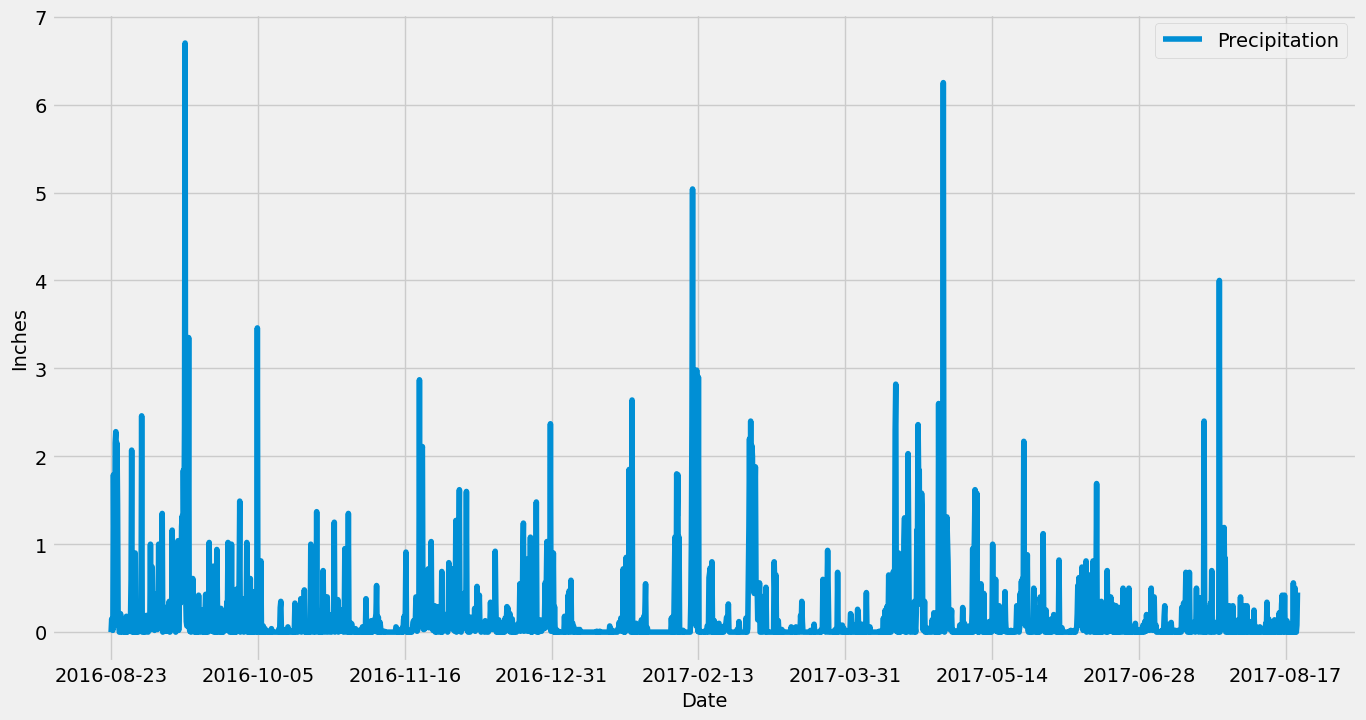

In [41]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

# Perform a query to retrieve the data and precipitation scores

last_year = dt.date(2017,8,23) - dt.timedelta(days= 365)

prcp_scores = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= last_year, measurement.prcp != None).\
    order_by(measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(prcp_scores, columns=['Date', 'Precipitation'])


# Sort the dataframe by date
prcp_df.set_index('Date', inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(figsize=(15,8), grid = True)
plt.ylabel("Inches")
plt.xlabel("Date")
plt.savefig('12monthprecipitation.png')

In [43]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [45]:
# Design a query to calculate the total number of stations in the dataset
session.query(measurement.station).distinct().count()

9

In [48]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
        order_by(func.count(measurement.station).desc()).all()

most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [51]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest_highest_avg = session.query(func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs)).\
                filter(measurement.station == 'USC00519281').order_by(func.min(measurement.tobs)).all()
lowest_highest_avg

[(54.0, 85.0, 71.66378066378067)]

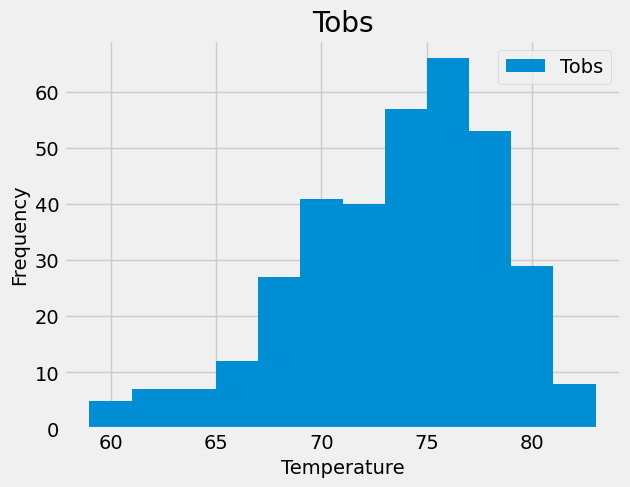

In [68]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temp_last_year = session.query(measurement.tobs).\
      filter(measurement.date >= last_year, measurement.station == 'USC00519281').\
      order_by(measurement.tobs).all()
      

temp_df = pd.DataFrame(temp_last_year, columns=['Tobs'])


temp_df.hist(bins = 12)
plt.ylabel("Frequency")
plt.xlabel("Temperature")
labels = ["Tobs"]
plt.legend(labels)

plt.savefig('12monthtemperature.png')


# Close Session

In [69]:
# Close Session
session.close()